# Le cancer du sein dans le Wisconsin

## Les données

In [32]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('./donnees/Breast Cancer Wisconsin/data.csv')
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [34]:
df = df.drop(columns=[df.columns[-1]])

In [35]:
df_worst = df[['diagnosis'] + [c for c in df.columns if c.endswith('_worst')]]

## EDA

<AxesSubplot: ylabel='diagnosis'>

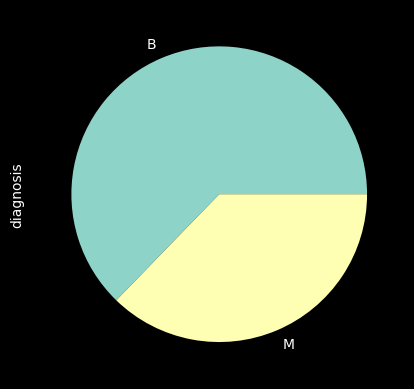

In [36]:
df.diagnosis.value_counts().plot(kind='pie')

<AxesSubplot: >

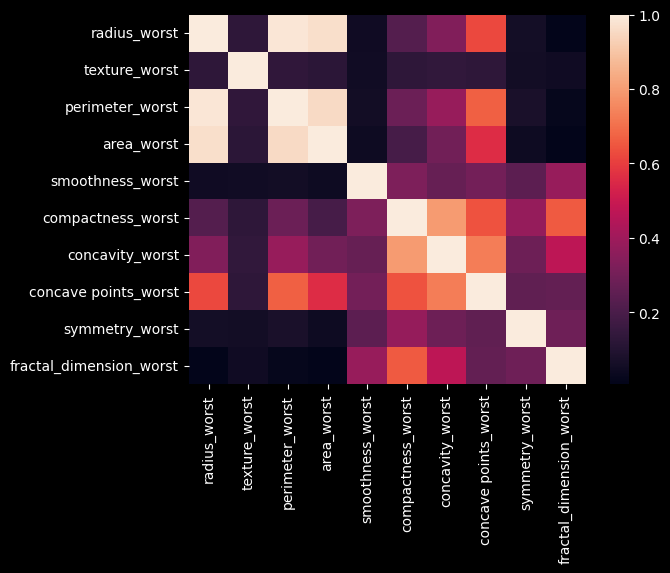

In [37]:
sns.heatmap(df_worst.corr()**2)

> Périmètre, rayon et taille de la surface du sein, sont assez intuitivement très corrélés. Ce serait donc répétitif de laisser les 3 simultanément (-> *overfitting* sinon, donc réduction dimensionnalité à prévoir).

In [38]:
sns.pairplot(df_worst, hue='diagnosis')

In [39]:
tmp_df = df[['diagnosis']+[c for c in df.columns if c.startswith('fractal_dimension')]]
sns.pairplot(tmp_df, hue='diagnosis')

> La dimension fractale ne permettra pas de déterminer le diagnostique (points trop similaires) !

Pour le reste des *features*, on procède à une réduction de dimensionnalité automatique.

## Réduction de dimensionnalité

In [40]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [41]:
target = ['diagnosis']
features = [
    'radius_mean', 
    'radius_se', 
    'radius_worst', 
    'texture_mean', 
    'texture_se', 
    'texture_worst',
    'smoothness_mean', 
    'smoothness_se',
    'smoothness_worst',
    'compactness_mean', 
    'compactness_se', 
    'compactness_worst', 
    'concavity_mean',
    'concavity_se', 
    'concavity_worst', 
    'concave points_mean', 
    'concave points_se', 
    'concave points_worst',
    'symmetry_mean', 
    'symmetry_se',
    'symmetry_worst', 
    # 'fractal_dimension_mean',
    # 'fractal_dimension_se', 
    # 'fractal_dimension_worst'
]

In [42]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

### PCA

In [43]:
pca = PCA('mle')
pca.fit(df[features])

PCA(n_components='mle')

<AxesSubplot: >

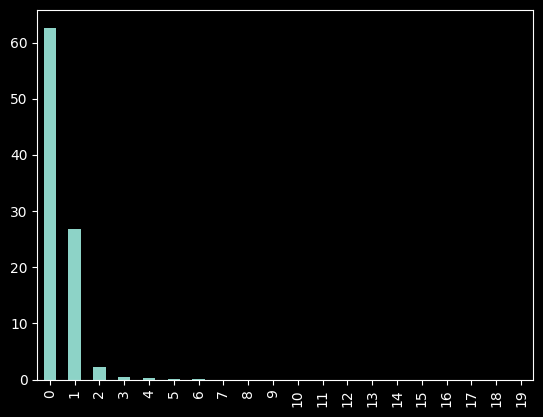

In [46]:
pd.Series(pca.explained_variance_).plot(kind='bar')

> 2 dimensions suffisantes avec le PCA

### Importance des features

In [13]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(df[features], df[target])

features_df = pd.DataFrame({
    "Importance": rfc.feature_importances_,
    "Feature": features
})
features_df.sort_values('Importance', ascending=False).plot(x='Feature',kind='bar')

C:\Users\leo.logel\AppData\Local\Temp\ipykernel_32452\267374538.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(df[features], df[target])


<AxesSubplot: xlabel='Feature'>

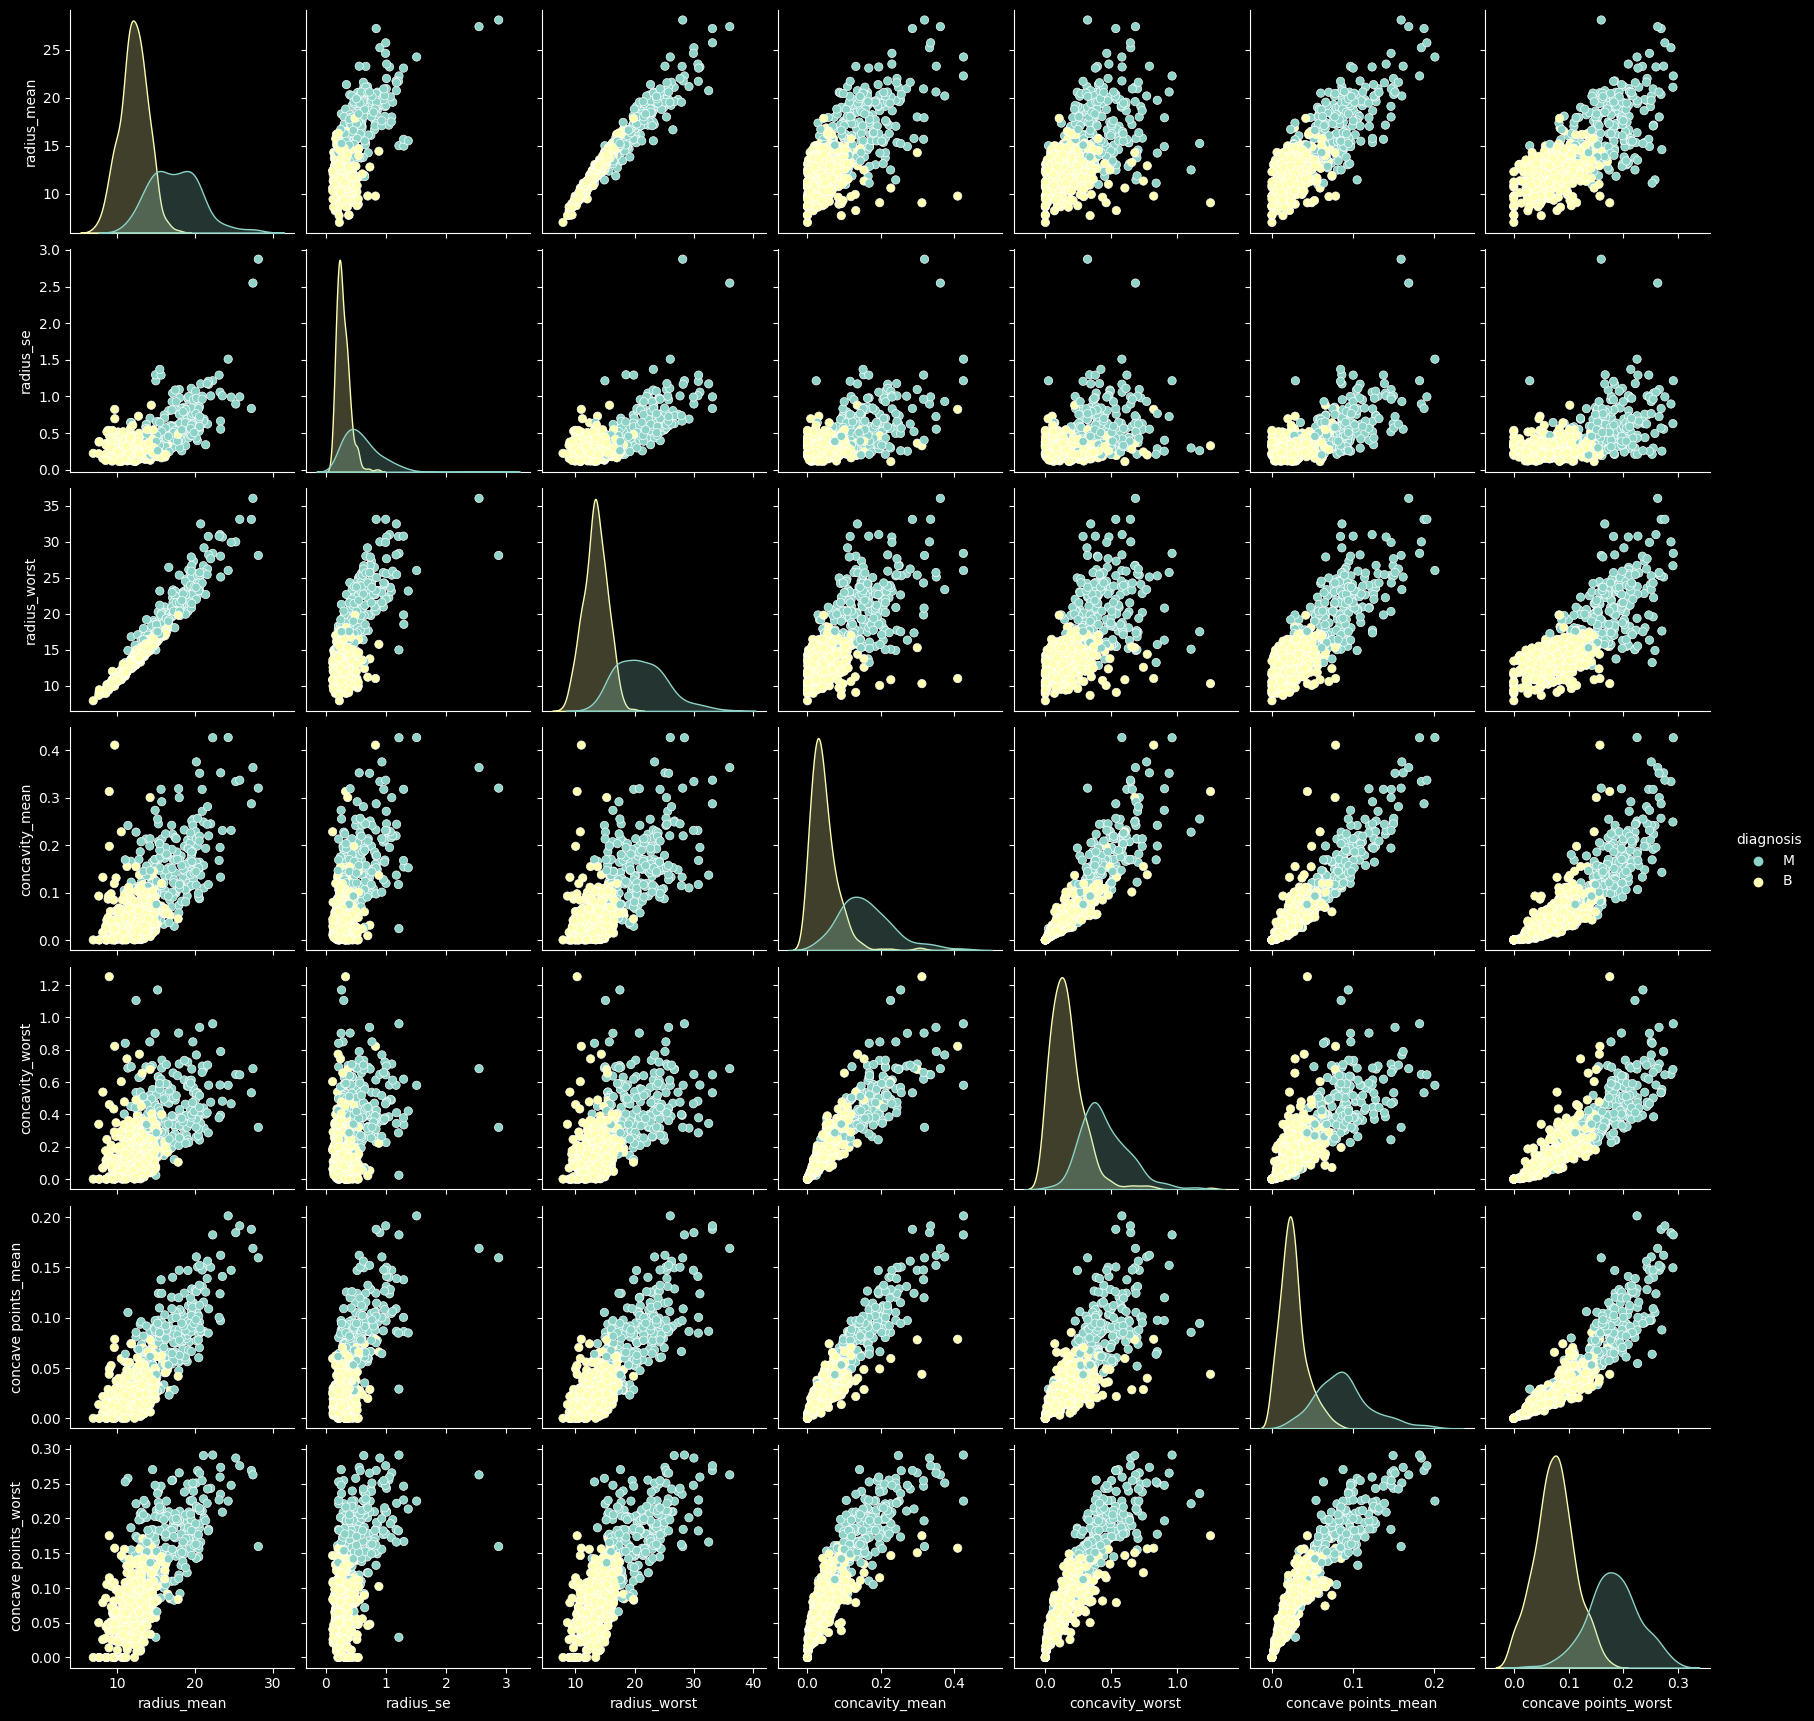

In [14]:
rfc_features = list(features_df.loc[features_df.Importance > 0.05].Feature)
sns.pairplot(df[target+rfc_features], hue=target[0])

## Modèle de détection des cancers

> NB : les erreurs les plus graves sont pour le cadre de la matrice de confusion en **bas à gauche** = la personne à un cancer mais ce n'est pas détecté.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [16]:
df.diagnosis = df.diagnosis.map({'M':1, 'B':0})

In [17]:
def trial_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred) / len(y_pred)
    sns.heatmap(cm, annot=True, fmt='.1%')
    plt.show()
    return model

### Avec la réduction du PCA

In [47]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[features])
y_pca = df[target].values
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, random_state=0, test_size=0.3)

C:\Users\leo.logel\AppData\Local\Temp\ipykernel_32452\1195093298.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


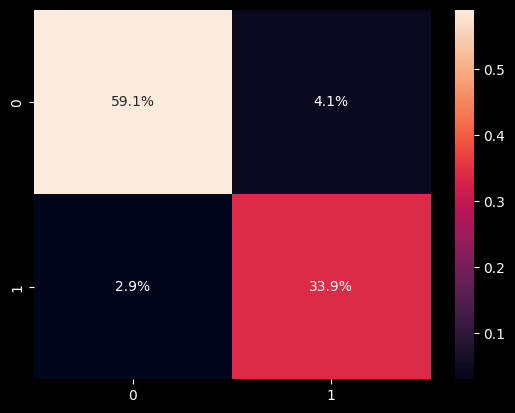

In [48]:
rfc_pca = trial_model(RandomForestClassifier(), X_pca_train, X_pca_test, y_pca_train, y_pca_test)

c:\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


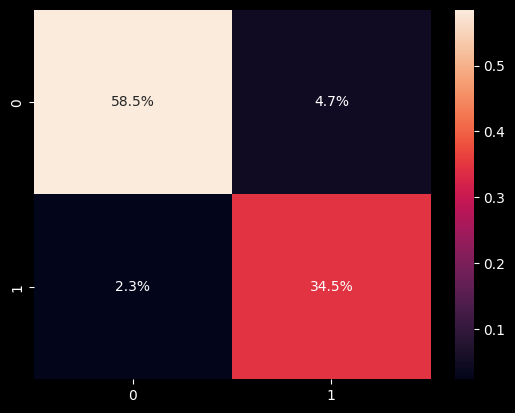

In [49]:
knc_pca = trial_model(KNeighborsClassifier(), X_pca_train, X_pca_test, y_pca_train, y_pca_test)

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


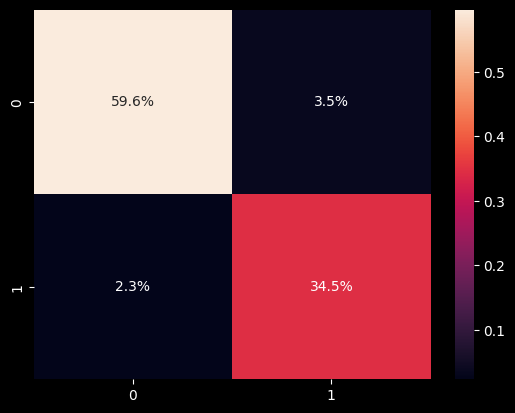

In [50]:
svc_pca = trial_model(SVC(), X_pca_train, X_pca_test, y_pca_train, y_pca_test)

### Avec la sélection du RFC

In [51]:
X_rfc = df[rfc_features].values
y_rfc = df[target].values
X_rfc_train, X_rfc_test, y_rfc_train, y_rfc_test = train_test_split(X_rfc, y_rfc, random_state=0, test_size=0.3)

In [52]:
rfc_rfc = trial_model(RandomForestClassifier(), X_rfc_train, X_rfc_test, y_rfc_train, y_rfc_test)

C:\Users\leo.logel\AppData\Local\Temp\ipykernel_32452\1195093298.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


c:\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


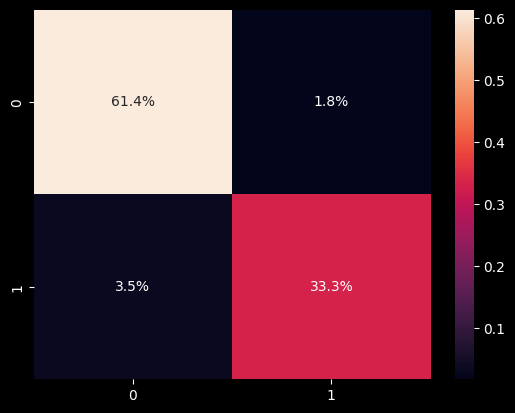

In [53]:
knc_rfc = trial_model(KNeighborsClassifier(), X_rfc_train, X_rfc_test, y_rfc_train, y_rfc_test)

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


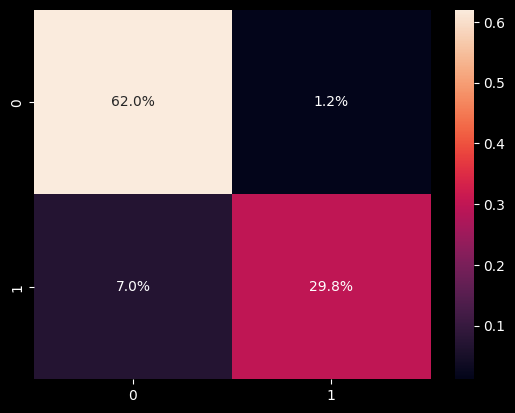

In [54]:
svc_rfc = trial_model(SVC(), X_rfc_train, X_rfc_test, y_rfc_train, y_rfc_test)